In [1]:
import  os

folder           =  r'D:\DrPKV\20220708'
file1            =  './Output/Predicted_Values_train_data_2022_07_08_16_04_22.csv'
file2            =  './Output/Predicted_Values_test_data_2022_07_08_16_14_35.csv'

os.chdir(folder)


In [2]:
import   pandas            as      pd
from     sklearn           import  metrics
from     sklearn.metrics   import  classification_report
import   seaborn           as      sns
import   matplotlib.pyplot as      plt

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
def measures_cm(model, datatype, act, pred):
   
    c_matrix = pd.crosstab(act,pred, rownames=['Actual'], colnames=['Predicted'])

    print("\nModel performance of %s" %model)
    print("\nDataset used %s" %datatype)

    sns.heatmap(c_matrix, annot = True, fmt = '.6g')
    plt.show()
    target_names = [ 'Healthy', 'NPA']
    print(classification_report(act, pred, target_names = target_names))

In [5]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [6]:
df_train       =    pd.read_csv(file1)
print('Train data shape {}'.format(df_train.shape))

Train data shape (81000, 6)


In [7]:
df_train.columns

Index(['Fole No', 'Train_y_true', 'CART Prediction', 'RF Prediction',
       'XGB Prediction', 'Consensus'],
      dtype='object')

In [8]:
df_test       =    pd.read_csv(file2)
print('Test data shape {}'.format(df_test.shape))

Test data shape (9000, 6)


In [9]:
df_test.columns

Index(['Fole No', 'Test_y_true', 'CART Prediction', 'RF Prediction',
       'XGB Prediction', 'Consensus'],
      dtype='object')

In [10]:
Col_Models_List =  ['CART_Train_y_pred', 'RF_Train_y_pred', 'XGBoost_Train_y_pred', 'Consensus']


Model performance of Consensus

Dataset used Training dataset


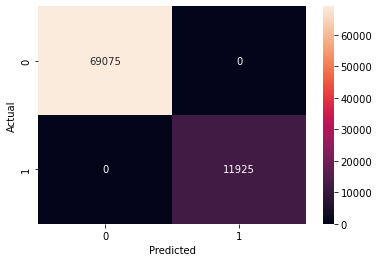

              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00     69075
         NPA       1.00      1.00      1.00     11925

    accuracy                           1.00     81000
   macro avg       1.00      1.00      1.00     81000
weighted avg       1.00      1.00      1.00     81000



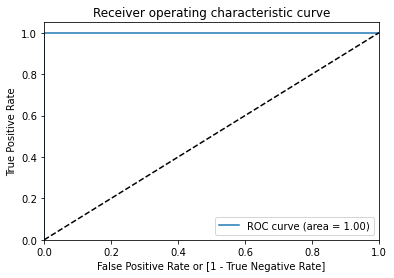

In [11]:
model      =  'Consensus' 
act_tr     =   df_train.loc[:, 'Train_y_true']  
pred_tr    =   df_train.loc[:, model]  
measures_cm(model, 'Training dataset', act_tr, pred_tr)
draw_roc(act_tr, pred_tr)


Model performance of Consensus

Dataset used Test dataset


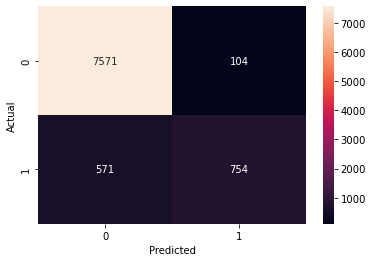

              precision    recall  f1-score   support

     Healthy       0.93      0.99      0.96      7675
         NPA       0.88      0.57      0.69      1325

    accuracy                           0.93      9000
   macro avg       0.90      0.78      0.82      9000
weighted avg       0.92      0.93      0.92      9000



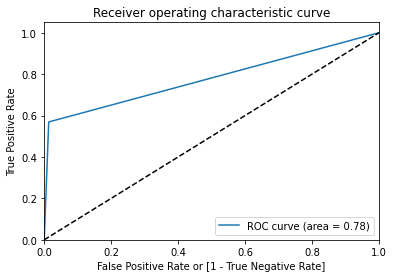

In [12]:
Col_Models_List =  ['CART_Test_y_pred', 'RF_Test_y_pred', 'XGBoost_Test_y_pred', 'Consensus']
model      =  'Consensus' 
act_te     =   df_test.loc[:, 'Test_y_true']      
pred_te    =   df_test.loc[:, model]  
measures_cm(model, 'Test dataset', act_te, pred_te)
draw_roc(act_te, pred_te)
Model performance of Consensus